In [17]:
using Revise, ReachabilityAnalysis, Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


In [33]:
@taylorize function henon!(du, u, p, t)
    p₁, p₂, q₁, q₂ = u[1], u[2], u[3], u[4]
    du[1] = -q₁*(1 + 2q₂)
    du[2] = -q₂-(q₁^2 - q₂^2)
    du[3] = p₁
    du[4] = p₂
end

u₀ = BallInf([0.1, 0.0, 0.0, 0.5], 0.001)

prob = @ivp(x' = henon!(x), dim:4, x(0) ∈ u₀)
@time sol = solve(prob, tspan=(0.0, 100.0), TMJets(abs_tol=1e-15));
solz = overapproximate(sol, Zonotope);

 28.775452 seconds (266.77 M allocations: 18.101 GiB, 11.29% gc time)


┌ Warning: Maximum number of integration steps reached; exiting. Try increasing `max_steps`.
└ @ ReachabilityAnalysis /home/sguadalupe/.julia/dev/ReachabilityAnalysis/src/Algorithms/TMJets/reach.jl:389


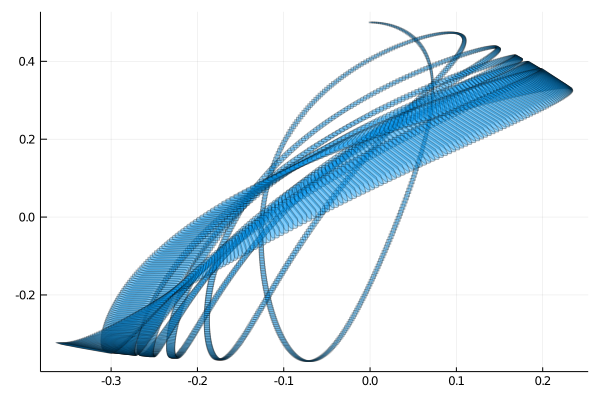

In [36]:
plot(solz, vars=(3, 4), alpha=0.3)